In [2]:
import pickle, pprint
import math
import netCDF4
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage import gaussian_filter
import pandas as pd
from tabulate import tabulate
import xarray as xr
import dask
import seaborn as sns

import matplotlib
from matplotlib.gridspec import GridSpec
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as imag
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as mticker
import types

import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch

import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import csv
import pandas as pd
import os

In [10]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

z = 30

In [5]:
others = netCDF4.Dataset("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
lons = np.array(others.variables['lon'])
lats = np.array(others.variables['lat'])
Xvar, Yvar = np.meshgrid(lons, lats)

In [13]:
CAM_nan_map_lst = np.load("../Data_For_Paper/LST_PRECIP_CAM.npy")
SPCAM5_nan_map_lst = np.load("../Data_For_Paper/LST_PRECIP_SPCAM5.npy")
SHERPA_nan_map_lst = np.load("../Data_For_Paper/LST_PRECIP_SHERPA.npy")
CONSTRAINED_nan_map_lst = np.load("../Data_For_Paper/LST_PRECIP_CONSTRAINED.npy")
UNCONSTRAINED_nan_map_lst = np.load("../Data_For_Paper/LST_PRECIP_UNCONSTRAINED.npy")

Sigmoid_nan_map_lst = np.load("../Data_For_Paper/LST_PRECIP_Sigmoid.npy")
Softplus_nan_map_lst = np.load("../Data_For_Paper/LST_PRECIP_Softplus.npy")
Linear_Baseline_nan_map_lst = np.load("../Data_For_Paper/LST_PRECIP_Trial_ReLU.npy")
Exponential_nan_map_lst = np.load("../Data_For_Paper/LST_PRECIP_Exponential.npy")

Text(0.52, 0.92, 'Hour of Daily Maximum Precipitation')

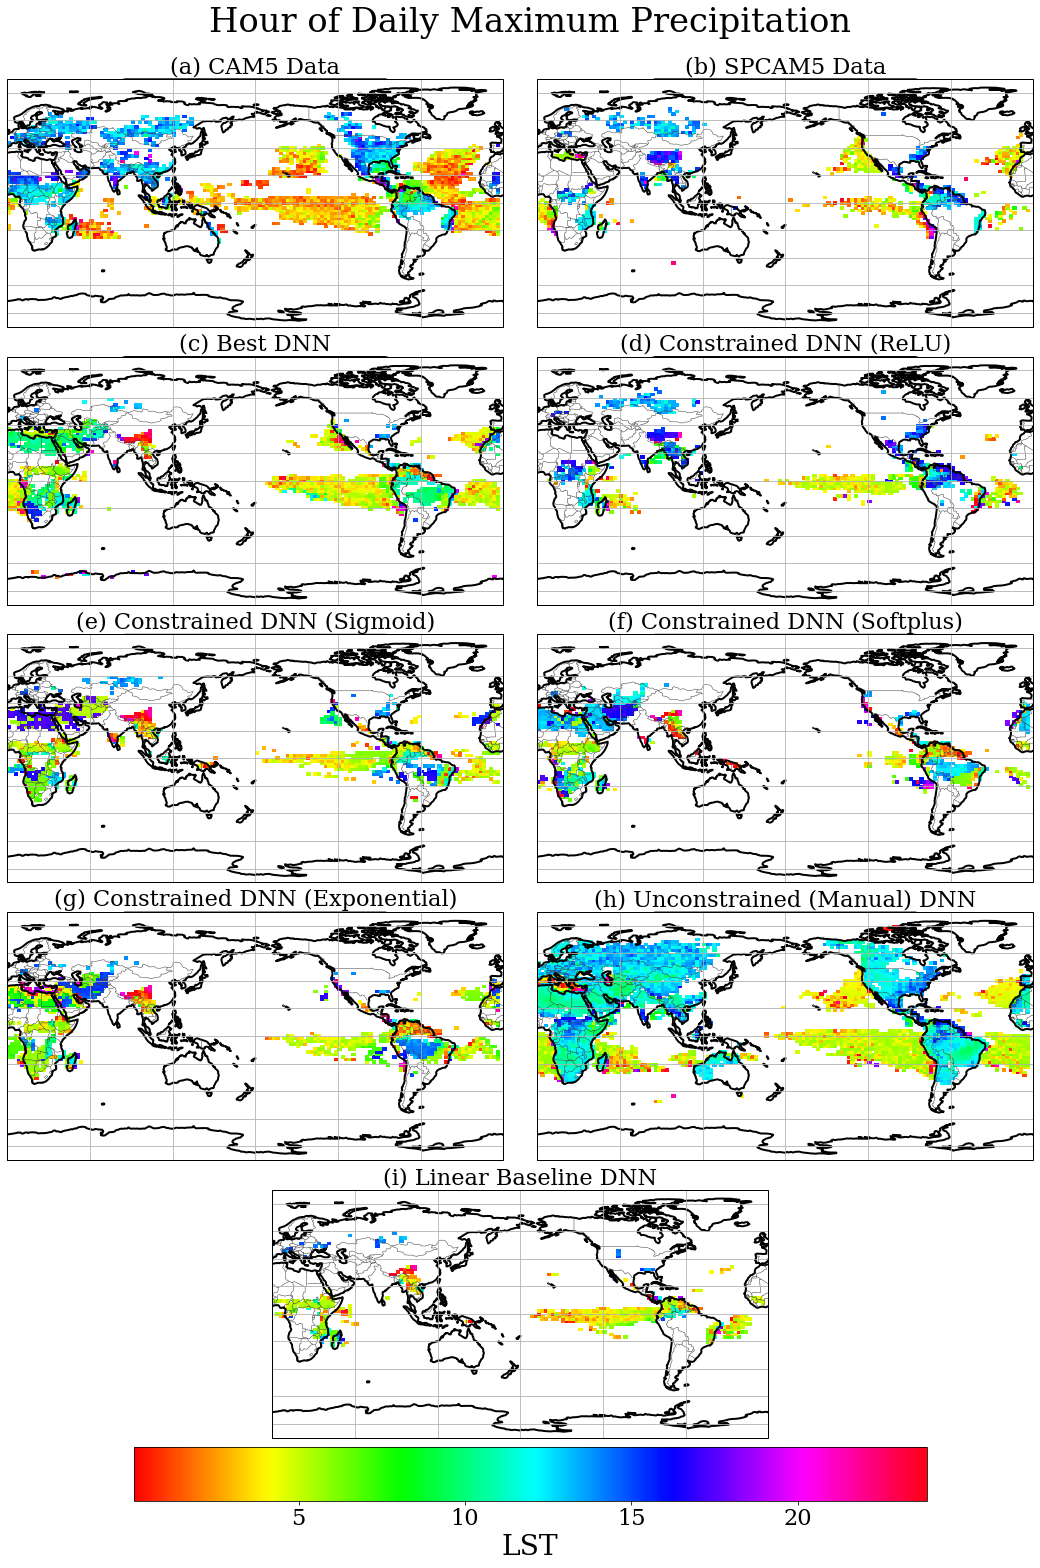

In [14]:
fig, ax = plt.subplots(5,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(19,25)

gs=GridSpec(5,2) # 2 rows,  columns

ax1=fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax2=fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax3=fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax4=fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax5=fig.add_subplot(gs[2,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax6=fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax7=fig.add_subplot(gs[3,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax8=fig.add_subplot(gs[3,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax9=fig.add_subplot(gs[4,:],projection=ccrs.PlateCarree(central_longitude=180)) # Second row, span all columns
ax10=fig.add_subplot(gs[4,1],projection=ccrs.PlateCarree(central_longitude=180))

contour_plot = ax1.pcolormesh(Xvar, Yvar, CAM_nan_map_lst, cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[0])
ax1.set_title('(a) CAM5 Data', fontsize = fz)
ax1.coastlines(linewidth=2.0,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax2.pcolormesh(Xvar, Yvar, SPCAM5_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour")
ax2.set_title('(b) SPCAM5 Data', fontsize = fz)
ax2.coastlines(linewidth=2.0,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax3.pcolormesh(Xvar, Yvar, SHERPA_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax3.set_title('(c) Best DNN', fontsize = fz)
ax3.coastlines(linewidth=2.0,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax4.pcolormesh(Xvar, Yvar, CONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax4.set_title('(d) Constrained DNN (ReLU)', fontsize = fz)
ax4.coastlines(linewidth=2.0,edgecolor='0.25')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax5.pcolormesh(Xvar, Yvar, Sigmoid_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax5.set_title('(e) Constrained DNN (Sigmoid)', fontsize = fz)
ax5.coastlines(linewidth=2.0,edgecolor='0.25')
ax5.gridlines()
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax6.pcolormesh(Xvar, Yvar, Softplus_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax6.set_title('(f) Constrained DNN (Softplus)', fontsize = fz)
ax6.coastlines(linewidth=2.0,edgecolor='0.25')
ax6.gridlines()
ax6.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax7.pcolormesh(Xvar, Yvar, Exponential_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax7.set_title('(g) Constrained DNN (Exponential)', fontsize = fz)
ax7.coastlines(linewidth=2.0,edgecolor='0.25')
ax7.gridlines()
ax7.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax8.pcolormesh(Xvar, Yvar, UNCONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax8.set_title('(h) Unconstrained (Manual) DNN', fontsize = fz)
ax8.coastlines(linewidth=2.0,edgecolor='0.25')
ax8.gridlines()
ax8.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax9.pcolormesh(Xvar, Yvar, Linear_Baseline_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax9.set_title('(i) Linear Baseline DNN', fontsize = fz)
ax9.coastlines(linewidth=2.0,edgecolor='0.25')
ax9.gridlines()
ax9.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


ax10.set_visible(False)
fig.delaxes(ax[4,1])
fig.delaxes(ax[4,0])


p0 = ax1.get_position().get_points().flatten()
p2 = ax1.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.1, 0.09, p0[1]-0.17, 0.03])
cbar = fig.colorbar(contour_plot, cax=ax_cbar, orientation='horizontal')
cbar.set_label('LST', fontsize=fz*1.25)
plt.subplots_adjust(hspace=0.12, wspace=0)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz*1.5)

Text(0.52, 0.92, 'Hour of Daily Maximum Precipitation')

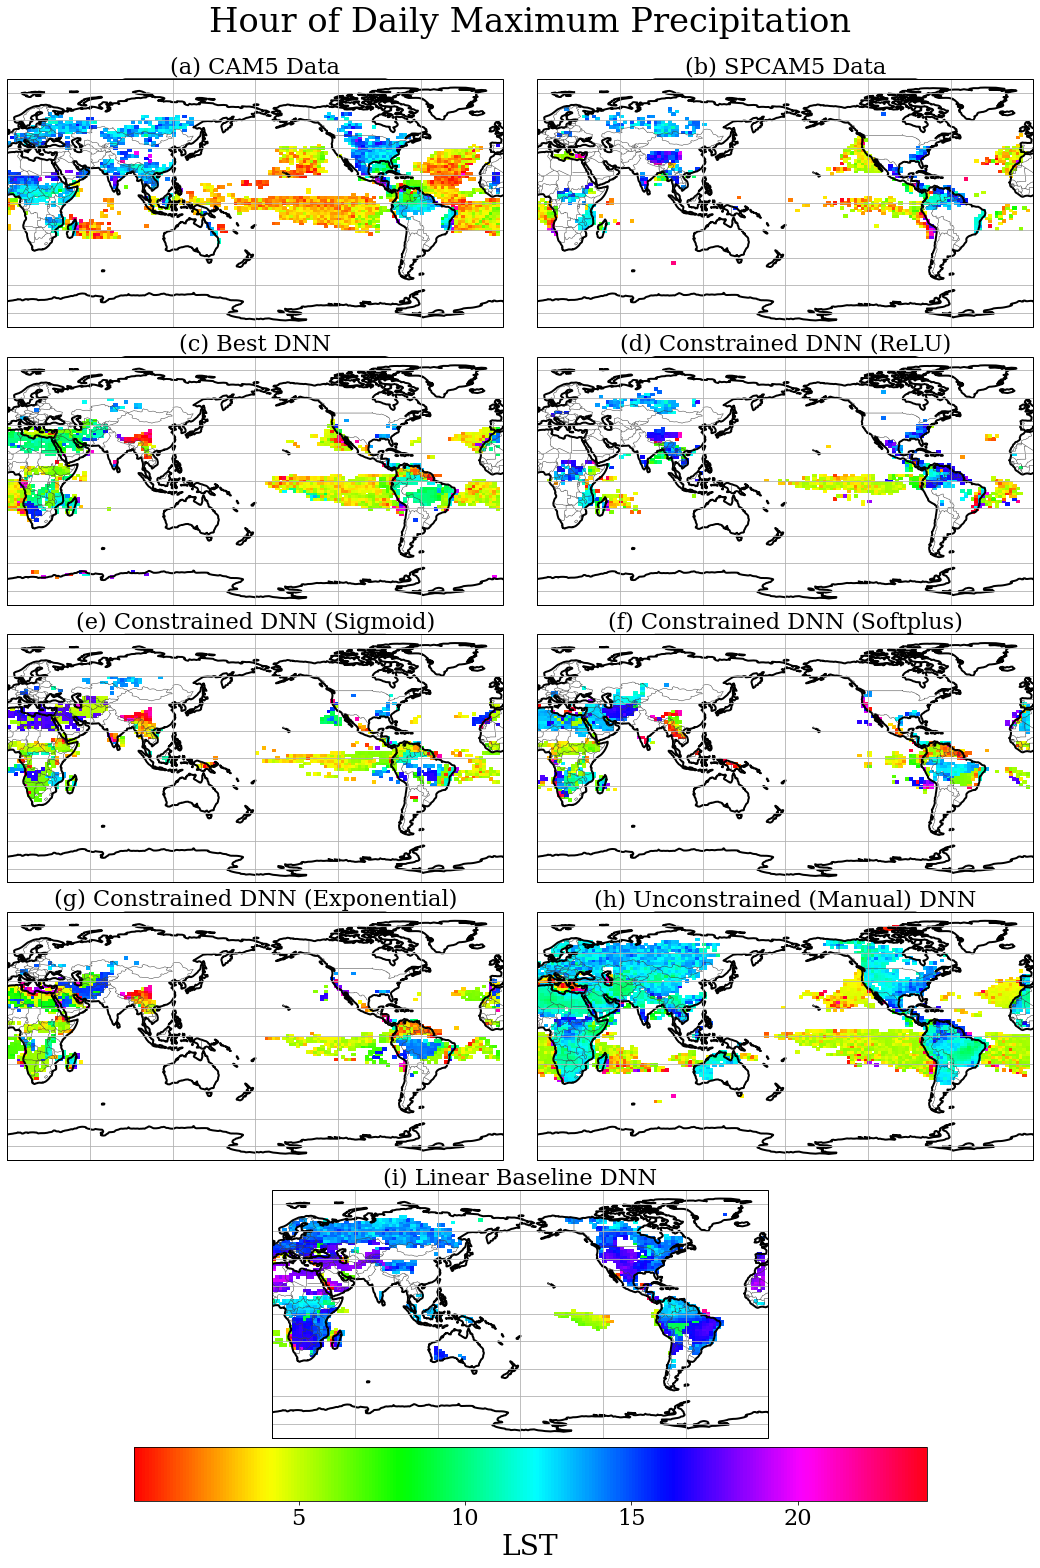

In [12]:
fig, ax = plt.subplots(5,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(19,25)

gs=GridSpec(5,2) # 2 rows,  columns

ax1=fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax2=fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax3=fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax4=fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax5=fig.add_subplot(gs[2,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax6=fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax7=fig.add_subplot(gs[3,0],projection=ccrs.PlateCarree(central_longitude=180)) # First row, first column
ax8=fig.add_subplot(gs[3,1],projection=ccrs.PlateCarree(central_longitude=180)) # First row, second column 
ax9=fig.add_subplot(gs[4,:],projection=ccrs.PlateCarree(central_longitude=180)) # Second row, span all columns
ax10=fig.add_subplot(gs[4,1],projection=ccrs.PlateCarree(central_longitude=180))

contour_plot = ax1.pcolormesh(Xvar, Yvar, CAM_nan_map_lst, cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[0])
ax1.set_title('(a) CAM5 Data', fontsize = fz)
ax1.coastlines(linewidth=2.0,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax2.pcolormesh(Xvar, Yvar, SPCAM5_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour")
ax2.set_title('(b) SPCAM5 Data', fontsize = fz)
ax2.coastlines(linewidth=2.0,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax3.pcolormesh(Xvar, Yvar, SHERPA_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax3.set_title('(c) Best DNN', fontsize = fz)
ax3.coastlines(linewidth=2.0,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax4.pcolormesh(Xvar, Yvar, CONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax4.set_title('(d) Constrained DNN (ReLU)', fontsize = fz)
ax4.coastlines(linewidth=2.0,edgecolor='0.25')
ax4.gridlines()
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax5.pcolormesh(Xvar, Yvar, Sigmoid_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax5.set_title('(e) Constrained DNN (Sigmoid)', fontsize = fz)
ax5.coastlines(linewidth=2.0,edgecolor='0.25')
ax5.gridlines()
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax6.pcolormesh(Xvar, Yvar, Softplus_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax6.set_title('(f) Constrained DNN (Softplus)', fontsize = fz)
ax6.coastlines(linewidth=2.0,edgecolor='0.25')
ax6.gridlines()
ax6.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax7.pcolormesh(Xvar, Yvar, Exponential_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax7.set_title('(g) Constrained DNN (Exponential)', fontsize = fz)
ax7.coastlines(linewidth=2.0,edgecolor='0.25')
ax7.gridlines()
ax7.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax8.pcolormesh(Xvar, Yvar, UNCONSTRAINED_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax8.set_title('(h) Unconstrained (Manual) DNN', fontsize = fz)
ax8.coastlines(linewidth=2.0,edgecolor='0.25')
ax8.gridlines()
ax8.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

contour_plot = ax9.pcolormesh(Xvar, Yvar, Linear_Baseline_nan_map_lst,cmap='hsv', transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "LST Hour", ax=ax[2])
ax9.set_title('(i) Linear Baseline DNN', fontsize = fz)
ax9.coastlines(linewidth=2.0,edgecolor='0.25')
ax9.gridlines()
ax9.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


ax10.set_visible(False)
fig.delaxes(ax[4,1])
fig.delaxes(ax[4,0])


p0 = ax1.get_position().get_points().flatten()
p2 = ax1.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.1, 0.09, p0[1]-0.17, 0.03])
cbar = fig.colorbar(contour_plot, cax=ax_cbar, orientation='horizontal')
cbar.set_label('LST', fontsize=fz*1.25)
plt.subplots_adjust(hspace=0.12, wspace=0)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz*1.5)